In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Dataset

In [2]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

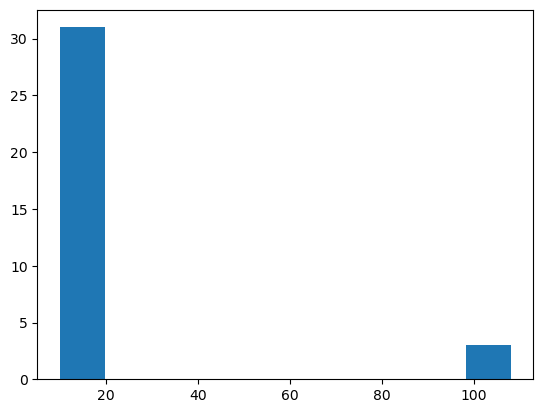

In [3]:
plt.hist(dataset)

## Z-score

   - Formula for Z score = (Observation — Mean)/Standard Deviation

   - z = (X — μ) / σ

In [4]:
outliers = []

def detect_outliers(data):
    threshold = 3 # 3rd standard deviation
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [5]:
detect_outliers(dataset)

[102, 107, 108]

## IQR
   1. Sort the data
   2. Calculate Q1(25%) and Q3(75%)
   3. IQR (Q3-Q1)
   4. Find the Lower Fence (Q1 - 1.5(IQR))
   5. Find the Upper Fence (Q3 + 1.5(IQR))

In [6]:
dataset = sorted(dataset)
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [7]:
q1, q3 = np.percentile(dataset, [25, 75])
q1, q3

(12.0, 15.0)

In [8]:
iqr = q3-q1
iqr

3.0

In [9]:
lower_fence = q1 - 1.5*iqr
upper_fence = q3 + 1.5*iqr

lower_fence, upper_fence

(7.5, 19.5)

In [10]:
import seaborn as sns

<Axes: >

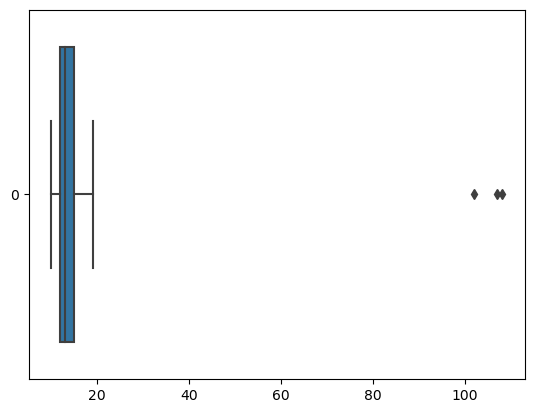

In [11]:
sns.boxplot(dataset, orient='h')